In [ ]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

In [1]:
%autosave 0

Autosave disabled


# Bibliografía

- Sutton & Barto, ["Reinforcement Learning: An Introduction", MIT Press, 2nd ed, 2018](http://www.incompleteideas.net/book/the-book.html)
- David Silver (DeepMind), ["Reinforced Learning Course"](https://www.youtube.com/watch?v=2pWv7GOvuf0&list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ)

# Aprendizaje Supervisado y No Supervisado 

En el caso supervisado tenemos un modelo  entrenado a partir de **ejemplos etiquetados** $(x, y)$ según una **función de costo**

Ejemplo:
$$
\min_w \sum_{i=1}^N (y_i - \hat y_i)^2 \quad \hat y_i = f_w (x_i)
$$

Ejemplo: Regresión, clasificación

En el caso no supervisado tenemos un modelo entrenado a partir de **ejemplos no etiquetados** $x$ según una **función de costo**

Ejemplo:

$$
\min_{C}  \sum_{k=1}^K \sum_{x\in C_k} (x - \mu_k)^2 
$$ 

Ejemplo: Extracción de características, clustering, visualización

# Aprendizaje Reforzado (RL)

El problema fundamental de RL es 

> aprender que acción tomar en una situación dada (en un ambiente cambiante)

El sistema que toma las decisiones e interactua con el ambiente se llama **agente**

Esto supone diferencias importantes con los paradigmas de Machine Learning anteriores

Resaltemos las diferencias:

- **Ambiente:** En lugar de ejemplos existe un **ambiente/mundo** el cual podemos observar
- **Observaciones:** La entrada que recibimos corresponde a la percepción (incompleta) del ambiente: **Estado**
- **Acciones:** En lugar de predicciones se toman decisiones: Escoger y realizar una o más acciones. **Consecuencias:** Las acciones afectan el ambiente
- **Recompensas:** En lugar de etiquetas la retroalimentación proviene de una **señal numérica llamada recompensa**. La recompensa está asociada a uno o más estados
- **Temporalidad:** El entrenamiento y la ejecución son secuenciales, no se puede asumir iid


El **agente** en aprendizaje reforzado es capaz de 
1. **observar el ambiente:** $O_t$
1. **recibir recompensa del ambiente:** $R_t$
1. **realizar acciones:** $A_t$

En pseudo-código

    for t in 1, 2, 3, ...., N
        do At
        get Ot
        get Rt

En diagrama:

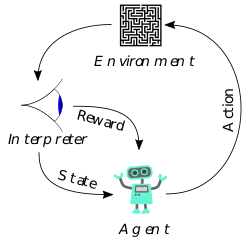


#### Conceptos clave

> Prueba y error: El agente debe descubrir que acción le entrega la mayor recompensa probándolas una a una

> Retardo: Las recompensas pueden demorar en llegar, las acciones pueden no traer recompensa inmediata pero si en el futuro

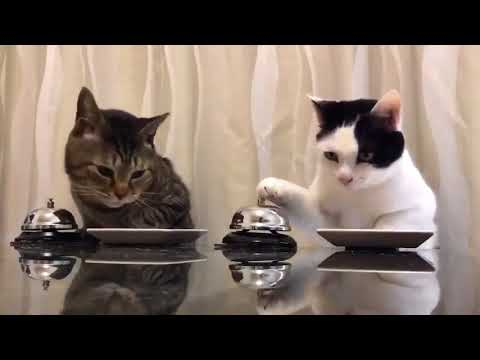

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("lpi19vExbzc", width=800, height=400)

> Puedes reconocer los agentes, las acciones, el ambiente, la recompensa y demás elementos de RL?

#### Ejemplos de  RL

Discutamos algunos ejemplos
- "Preparar nuestro desayuno" (Sección 1.2, Sutton & Barto)
    - Relacionado: https://youtu.be/E2evC2xTNWg
- Vehículo autónomo
- AI en videojuegos
- [Más](https://towardsdatascience.com/applications-of-reinforcement-learning-in-real-world-1a94955bcd12)


¿Qué tienen estos ejemplos en común?
> Interacción entre un agente que toma decisiones y su ambiente

> El agente trata de cumplir una meta a pesar de la incerteza del ambiente

> El ambiente usa la experiencia que adquiere para mejorar su comportamiento

### Recompensa

- La recompensa es un indicador de que tan bueno es el agente en un tiempo determinado
- En algunos casos solo existen una recompensa (final), en otros casos pueden haber recompensas intermedias


Objetivo del agente:

> Seleccionar accciones para maximizar la recompensa acumulada

En ciertos casos podría ser mejor abandonar una recompensa intermedia en pos de obtener una mayor recompensa final


> Todo agente de RL debe tener objetivos, debe poder sentir su ambiente y debe ser capaz de actuar sobre el mismo 


### Historia

La historia $H_t$ corresponde a todas las acciones, observaciones y recompensas hasta el tiempo $t$

### Estado

El estado $S_t^e$ es la representación del ambiente

Se usa el estado $S_t^e$ para predecir que ocurrirá en $S_{t+1}^e$ según las acciones que realicemos

- No toda la información del estado es relevante
- Usualmente no podemos observar el estado completo del ambiente

El agente también tiene un estado que es función de su historia $S_t^a = f(H_t)$

En un ambiente completamente observado se tiene que

$$
O_t = S_t^e = S_t^a
$$

En el caso más general se tendrá una ambiente parcialmente observado



### Estado con propiedad markoviana

Dado un tiempo $t$ me interesa saber cual es el estado siguiente $t+1$ más probable

Usando la regla de la cadena podrías escribir la probabilidad condicional

$$
p(S_{t+1}| S_t, S_{t-1}, S_{t-2}, \ldots, S_2, S_1)
$$

Una simplificación típica es la siguiente

$$
p(S_{t+1}| S_t)
$$

> El estado futuro sólo depende del presente

El estado actual es un estadístico suficiente del futuro

### Agente

El agente tiene tres componentes principales 

- Policy: Indica como escogemos las acciones
- Value: Se usa para evaluar los estados
- Model: Representa el ambiente

No siempre están presentes las tres

- Agentes basados en modelo/agentes *model-free*
- Agentes basados en policy o basados en value


#### Policy

Es un mapeo desde el espacio de estados al espacio de acciones: $S \to A$

Puede ser determinista

$$
a = \pi(s)
$$

o estocástica

$$
\pi(A|S) = P(A=a|S=s)
$$

Ej: Si hay un auto frente a mi doblo a la izquierda

#### Value

Es una predicción de la recompensa futura acumulada que el ambiente puede obtener partiendo de un cierto estado y siguiendo su  *policy*

$$
V_\Pi (s) = \mathbb{E}_\pi [R_t + \gamma R_{t+1} + \gamma^2 R_{t+2} + \ldots | S_t=s]
$$

donde $\gamma \approx 0.99$ es un factor de descuento que le da más importancia al presente: Controla la escala de tiempo del aprendizaje

#### Model

Hay dos cosas que el agente busca modelar

¿Cúal será el siguiente estado?

Se modela como una probabilidad de transicionar al estado $s'$ dado que estamos en $s$ y tomamos la acción $a$

$$
\mathcal{P}_{ss'}^a = P(S_{t+1}=s'|S_t=s|A_t =a)
$$

¿Cúal será la siguiente recompensa?

Se modela como el valor esperado de recompensa dado que tomo la acción $a$ en el estado $s$

$$
\mathcal{R}_s^a = \mathbb{E}[R|S_t=s, A_t=a]
$$

### Dificultades

- Cuidar el balance entre la 
    - explotación: El agente ha de explotar lo que sabe para obtener recompensa
    - exploración: El agente debe explorar para poder tomar mejores decisiones en el futuro
    - Si nos enfocamos en una de ellas el probl
- Toma de decisiones secuencial    

https://github.com/openai/gym

https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gym
from IPython import display

env = gym.make("Taxi-v3")
#env = gym.make("CartPole-v1")
#env = gym.make("SpaceInvaders-v0")
env.reset()
#plt.figure(figsize=(9,9), tight_layout=True)
#img = plt.imshow(env.render(mode='rgb_array')) # only call this once

for _ in range(10):
    env.render()
    #img.set_data(env.render(mode='rgb_array')) # just update the data
    #display.display(plt.gcf())
    #display.clear_output(wait=True)    
    action = env.action_space.sample() # Random acction
    observation, reward, done, info = env.step(action)

    if done:
        observation = env.reset()
env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


https://metacar-project.com/

https://www.youtube.com/watch?v=zR11FLZ-O9M&list=WL&index=14&t=0s

http://www.cs.us.es/~fsancho/?e=109